# Visualization for Query: Compare revenue across the years 2022, 2023, and 2024

In [1]:

        # Import necessary libraries
        import json
        import pandas as pd
        import matplotlib.pyplot as plt
        import seaborn as sns
        try:
            import plotly.express as px
            from plotly.offline import init_notebook_mode
            init_notebook_mode(connected=True)
            plotly_available = True
        except ImportError:
            plotly_available = False
        from IPython.display import display, HTML
                

In [2]:

    # Load the data
    data = {
  "2022": 1420000,
  "2024": 1750000
}
    query = "Compare revenue across the years 2022, 2023, and 2024"
    chart_type = "bar"

    # Print the data
    print("Query:", query)
    print("Data:", data)
            

Query: Compare revenue across the years 2022, 2023, and 2024
Data: {'2022': 1420000, '2024': 1750000}


In [3]:

    # Convert to DataFrame
    if isinstance(data, dict):
        df = pd.DataFrame(list(data.items()), columns=['Category', 'Value'])
    else:
        df = pd.DataFrame(data)
        
    # Sort data if categories look like years or quarters
    if all(isinstance(cat, str) and (cat.isdigit() or cat.startswith('Q')) for cat in df['Category']):
        df = df.sort_values('Category')
        
    display(df)
            

,Category,Value
0,2022,1420000
1,2024,1750000


## Matplotlib Visualization

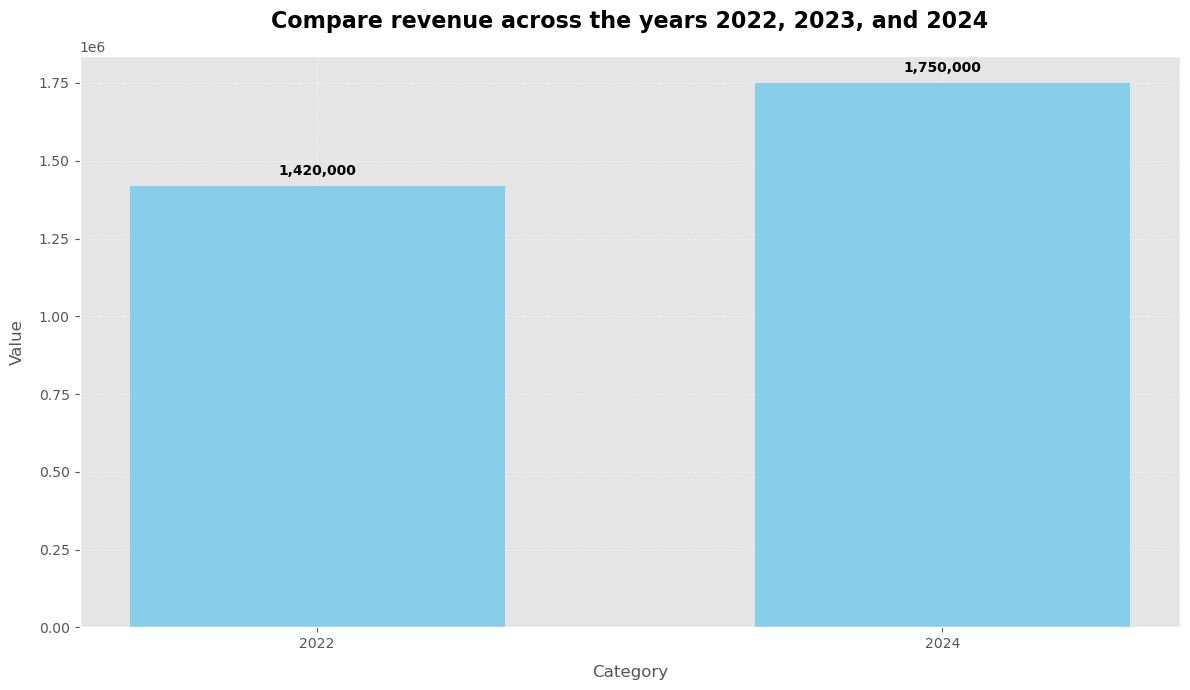

In [4]:

    # Set a professional style
    plt.style.use('ggplot')

    # Create matplotlib visualization
    plt.figure(figsize=(12, 7))

    if chart_type == 'bar':
        ax = plt.bar(df['Category'], df['Value'], color='skyblue', width=0.6)
        # Add value labels on top of bars
        for i, v in enumerate(df['Value']):
            plt.text(i, v + max(df['Value'])*0.02, f'{v:,}', ha='center', fontweight='bold')
            
    elif chart_type == 'line':
        plt.plot(df['Category'], df['Value'], marker='o', linestyle='-', linewidth=2, markersize=8, color='steelblue')
        # Add value labels
        for i, v in enumerate(df['Value']):
            plt.text(i, v + max(df['Value'])*0.02, f'{v:,}', ha='center')
            
    elif chart_type == 'pie':
        plt.pie(df['Value'], labels=df['Category'], autopct='%1.1f%%', startangle=90, 
                shadow=True, explode=[0.05]*len(df['Category']), textprops={'fontsize': 12})
        plt.axis('equal')
        
    elif chart_type == 'scatter':
        plt.scatter(df['Category'], df['Value'], s=100, alpha=0.7, color='steelblue')
        # Add trendline
        z = np.polyfit(range(len(df['Category'])), df['Value'], 1)
        p = np.poly1d(z)
        plt.plot(df['Category'], p(range(len(df['Category']))), "r--", alpha=0.7)
    else:
        plt.bar(df['Category'], df['Value'], color='skyblue')  # Default to bar

    plt.title(query, fontsize=16, pad=20, fontweight='bold')
    plt.xlabel("Category", fontsize=12, labelpad=10)
    plt.ylabel("Value", fontsize=12, labelpad=10)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.xticks(rotation=45 if len(df) > 5 else 0)
    plt.tight_layout()
    plt.show()
            

## Interactive Plotly Visualization (if available)

In [5]:

    # Create plotly visualization if available
    if plotly_available:
        if chart_type == 'bar':
            fig = px.bar(df, x='Category', y='Value', title=query,
                    color='Value', color_continuous_scale='viridis',
                    text='Value', template='plotly_white')
            fig.update_traces(texttemplate='%{text:,}', textposition='outside')
                    
        elif chart_type == 'line':
            fig = px.line(df, x='Category', y='Value', title=query, 
                    markers=True, line_shape='linear',
                    template='plotly_white')
            fig.update_traces(marker=dict(size=10))
            
        elif chart_type == 'pie':
            fig = px.pie(df, values='Value', names='Category', title=query,
                    hole=0.4, template='plotly_white')
            
        elif chart_type == 'scatter':
            fig = px.scatter(df, x='Category', y='Value', title=query, 
                        size='Value', template='plotly_white',
                        trendline='ols')
        else:
            fig = px.bar(df, x='Category', y='Value', title=query)

        fig.update_layout(
            title_font_size=20,
            xaxis_title="Category",
            yaxis_title="Value",
            legend_title="Legend",
            font=dict(size=12),
            height=500,
        )
        
        fig.show()
    else:
        print("Plotly is not available. Install it with: pip install plotly")
            